In [404]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [430]:
rows = []
with open("TruckGPSRecord.csv", "r", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split(",")
        if len(parts) == 6:
            rows.append(parts)


In [431]:
df = pd.DataFrame(rows, columns=["GPS_ID", "RFID tag", "Pickup Plan", "Timestamp", "Latitude", "Longitude"])
df

GPS_ID    RFID tag Pickup Plan            Timestamp Latitude Longitude
0      GPS_tr7  rfidXNPCXE       Pcp35  2024-05-02 23:56:35   21.986   100.489
1      GPS_tr7  rfidXNPCXE       Pcp35  2024-05-02 23:56:40  21.9867  100.4897
2      GPS_tr7  rfidXNPCXE       Pcp35  2024-05-02 23:56:45  21.9872  100.4898
3      GPS_tr7  rfidXNPCXE       Pcp35  2024-05-02 23:56:50  21.9876  100.4901
4      GPS_tr7  rfidXNPCXE       Pcp35  2024-05-02 23:56:55  21.9879  100.4904
...        ...         ...         ...                  ...      ...       ...
38587  GPS_tr8  rfidCEZEBQ      Pcp235  2024-05-31 08:50:05  21.9839  100.5696
38588  GPS_tr8  rfidCEZEBQ      Pcp235  2024-05-31 08:50:10  21.9841  100.5696
38589  GPS_tr8  rfidCEZEBQ      Pcp235  2024-05-31 08:50:15  21.9843  100.5698
38590  GPS_tr8  rfidCEZEBQ      Pcp235  2024-05-31 08:50:20  21.9846  100.5698
38591  GPS_tr8  rfidCEZEBQ      Pcp235  2024-05-31 08:50:25  21.9848    100.57

[38592 rows x 6 columns]

In [432]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Latitude"] = pd.to_numeric(df["Latitude"], errors='coerce')
df["Longitude"] = pd.to_numeric(df["Longitude"], errors='coerce')
df["Date"] = df["Timestamp"].dt.date
df

GPS_ID    RFID tag Pickup Plan           Timestamp  Latitude  \
0      GPS_tr7  rfidXNPCXE       Pcp35 2024-05-02 23:56:35   21.9860   
1      GPS_tr7  rfidXNPCXE       Pcp35 2024-05-02 23:56:40   21.9867   
2      GPS_tr7  rfidXNPCXE       Pcp35 2024-05-02 23:56:45   21.9872   
3      GPS_tr7  rfidXNPCXE       Pcp35 2024-05-02 23:56:50   21.9876   
4      GPS_tr7  rfidXNPCXE       Pcp35 2024-05-02 23:56:55   21.9879   
...        ...         ...         ...                 ...       ...   
38587  GPS_tr8  rfidCEZEBQ      Pcp235 2024-05-31 08:50:05   21.9839   
38588  GPS_tr8  rfidCEZEBQ      Pcp235 2024-05-31 08:50:10   21.9841   
38589  GPS_tr8  rfidCEZEBQ      Pcp235 2024-05-31 08:50:15   21.9843   
38590  GPS_tr8  rfidCEZEBQ      Pcp235 2024-05-31 08:50:20   21.9846   
38591  GPS_tr8  rfidCEZEBQ      Pcp235 2024-05-31 08:50:25   21.9848   

       Longitude        Date  
0       100.4890  2024-05-02  
1       100.4897  2024-05-02  
2       100.4898  2024-05-02  
3       100.4901  2024-05-02  
4       100.4904  2024-05-02  
...          ...         ...  
38587   100.5696  2024-05-31  
38588   100.5696  2024-05-31  
38589   100.5698  2024-05-31  
38590   100.5698  2024-05-31  
38591   100.5700  2024-05-31  

[38592 rows x 7 columns]

In [433]:
path_regions = {
    "entry_to_register": {"lat_min": 21.9860, "lat_max": 21.9940, "lon_min": 100.4890, "lon_max": 100.4930},
    "register_to_weigh": {"lat_min": 21.9945, "lat_max": 22.0005, "lon_min": 100.4950, "lon_max": 100.52},
    "weigh_to_yard":     {"lat_min": 22.0080, "lat_max": 22.0150, "lon_min": 100.5250, "lon_max": 100.5450},
    "yard_to_weigh":     {"lat_min": 21.9880, "lat_max": 22.0075, "lon_min": 100.5555, "lon_max": 100.5650},
    "weigh_to_exit":     {"lat_min": 21.98, "lat_max": 21.9850, "lon_min": 100.5655, "lon_max": 100.5700},
}


In [434]:
def assign_path_stage(row):
    for stage, bounds in path_regions.items():
        if (bounds["lat_min"] <= row["Latitude"] <= bounds["lat_max"] and
            bounds["lon_min"] <= row["Longitude"] <= bounds["lon_max"]):
            return stage
    return "off_path"

df["Path_Stage"] = df.apply(assign_path_stage, axis=1)
df

GPS_ID    RFID tag Pickup Plan           Timestamp  Latitude  \
0      GPS_tr7  rfidXNPCXE       Pcp35 2024-05-02 23:56:35   21.9860   
1      GPS_tr7  rfidXNPCXE       Pcp35 2024-05-02 23:56:40   21.9867   
2      GPS_tr7  rfidXNPCXE       Pcp35 2024-05-02 23:56:45   21.9872   
3      GPS_tr7  rfidXNPCXE       Pcp35 2024-05-02 23:56:50   21.9876   
4      GPS_tr7  rfidXNPCXE       Pcp35 2024-05-02 23:56:55   21.9879   
...        ...         ...         ...                 ...       ...   
38587  GPS_tr8  rfidCEZEBQ      Pcp235 2024-05-31 08:50:05   21.9839   
38588  GPS_tr8  rfidCEZEBQ      Pcp235 2024-05-31 08:50:10   21.9841   
38589  GPS_tr8  rfidCEZEBQ      Pcp235 2024-05-31 08:50:15   21.9843   
38590  GPS_tr8  rfidCEZEBQ      Pcp235 2024-05-31 08:50:20   21.9846   
38591  GPS_tr8  rfidCEZEBQ      Pcp235 2024-05-31 08:50:25   21.9848   

       Longitude        Date         Path_Stage  
0       100.4890  2024-05-02  entry_to_register  
1       100.4897  2024-05-02  entry_to_register  
2       100.4898  2024-05-02  entry_to_register  
3       100.4901  2024-05-02  entry_to_register  
4       100.4904  2024-05-02  entry_to_register  
...          ...         ...                ...  
38587   100.5696  2024-05-31      weigh_to_exit  
38588   100.5696  2024-05-31      weigh_to_exit  
38589   100.5698  2024-05-31      weigh_to_exit  
38590   100.5698  2024-05-31      weigh_to_exit  
38591   100.5700  2024-05-31      weigh_to_exit  

[38592 rows x 8 columns]

In [435]:
truck_df = pd.read_csv('object_Truck.csv')
truck_df = truck_df['ocel_id;ocel_time;ocel_changed_field;RFID No;Pickup Plan ID;Cargo ID;LPT;Axles;Scheduled Pickup Weight;Truck Status;Truck Location Validity;Truck Weight;Truck_Weight_Status'].str.split(';', expand=True)
truck_df.columns = ['ocel_id','ocel_time','ocel_changed_field','RFID No','Pickup Plan ID','Cargo ID','LPT','Axles','Scheduled Pickup Weight','Truck Status','Truck Location Validity','Truck Weight','Truck_Weight_Status']
truck_df.rename(columns={'ocel_id': 'ocel_object_id', 'ocel_time': 'timestamp'}, inplace=True)
valid_rfid_df = truck_df[truck_df['RFID No'].notna() & (truck_df['RFID No'] != '')]
truck_to_rfid = (
    valid_rfid_df[['ocel_object_id', 'RFID No']]
    .drop_duplicates(subset='ocel_object_id', keep='first')
    .set_index('ocel_object_id')['RFID No']
    .to_dict()
)
truck_to_rfid

{'tr24': 'rfidPCMKUV',
 'tr10': 'rfidOOVDPE',
 'tr4': 'rfidTGNSNI',
 'tr14': 'rfidYREIDQ',
 'tr28': 'rfidUOOSAQ',
 'tr50': 'rfidXXIVNB',
 'tr32': 'rfidQCYTDW',
 'tr35': 'rfidPODCVH',
 'tr41': 'rfidXWLCID',
 'tr43': 'rfidGETQDY',
 'tr27': 'rfidWOMLHU',
 'tr11': 'rfidSCPJCE',
 'tr20': 'rfidXPDNSC',
 'tr44': 'rfidJRRVME',
 'tr34': 'rfidFMSUBE',
 'tr25': 'rfidMFTSWW',
 'tr5': 'rfidSVWFVZ',
 'tr3': 'rfidDRCUXI',
 'tr17': 'rfidVYEBVG',
 'tr12': 'rfidVYYKGK',
 'tr29': 'rfidOIGYVC',
 'tr46': 'rfidEJHYOM',
 'tr33': 'rfidMVJRXE',
 'tr37': 'rfidUSNSHC',
 'tr23': 'rfidKGKHYU',
 'tr49': 'rfidNJSWIM',
 'tr16': 'rfidIICVAH',
 'tr15': 'rfidIDWLCS',
 'tr40': 'rfidZEKWJR',
 'tr18': 'rfidEGNSMV',
 'tr1': 'rfidBKTRLP',
 'tr7': 'rfidXNPCXE',
 'tr39': 'rfidYGABPB',
 'tr22': 'rfidENJOLW',
 'tr38': 'rfidVIASXP',
 'tr21': 'rfidTLWXGZ',
 'tr36': 'rfidHYTHBN',
 'tr26': 'rfidNQRMLR',
 'tr45': 'rfidSLQPDR',
 'tr9': 'rfidKEBJGC',
 'tr47': 'rfidJGLUGP',
 'tr13': 'rfidGTHHGD',
 'tr30': 'rfidCBMLGM',
 'tr2': 'rfidSQKJ

In [436]:
df['RFID tag'] = df['RFID tag'].astype(str).str.strip()
rfid_to_truck = {v.strip(): k for k, v in truck_to_rfid.items() if isinstance(v, str)}
df['Truck ID'] = df['RFID tag'].map(rfid_to_truck)
df = df.rename(columns={'Pickup Plan':'Pickup Plan ID'})
df


GPS_ID    RFID tag Pickup Plan ID           Timestamp  Latitude  \
0      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:35   21.9860   
1      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:40   21.9867   
2      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:45   21.9872   
3      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:50   21.9876   
4      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:55   21.9879   
...        ...         ...            ...                 ...       ...   
38587  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:05   21.9839   
38588  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:10   21.9841   
38589  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:15   21.9843   
38590  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:20   21.9846   
38591  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:25   21.9848   

       Longitude        Date         Path_Stage Truck ID  
0       100.4890  2024-05-02  entry_to_register      tr7  
1       100.4897  2024-05-02  entry_to_register      tr7  
2       100.4898  2024-05-02  entry_to_register      tr7  
3       100.4901  2024-05-02  entry_to_register      tr7  
4       100.4904  2024-05-02  entry_to_register      tr7  
...          ...         ...                ...      ...  
38587   100.5696  2024-05-31      weigh_to_exit      tr8  
38588   100.5696  2024-05-31      weigh_to_exit      tr8  
38589   100.5698  2024-05-31      weigh_to_exit      tr8  
38590   100.5698  2024-05-31      weigh_to_exit      tr8  
38591   100.5700  2024-05-31      weigh_to_exit      tr8  

[38592 rows x 9 columns]

In [440]:
all_pickups = pd.read_csv('All_pickups.csv')
all_pickups

event_id            timestamp ocel_object_id  \
0             enter_tr1_Pcp404  2024-05-06 05:25:57            tr1   
1                          NaN  2024-05-06 05:26:27            tr1   
2                          NaN  2024-05-06 05:26:32            tr1   
3                          NaN  2024-05-06 05:26:37            tr1   
4                          NaN  2024-05-06 05:26:42            tr1   
...                        ...                  ...            ...   
36082                      NaN  2024-05-28 03:27:37            tr9   
36083  issue_ticket_tr9_Pcp267  2024-05-28 03:31:35            tr9   
36084   input_tally_tr9_Pcp267  2024-05-28 03:31:36            tr9   
36085      eval_tr9exit_Pcp267  2024-05-28 03:31:36            tr9   
36086          exit_tr9_Pcp267  2024-05-28 03:35:07            tr9   

      ocel_IoT_object_id rain_condition                   activity  RFID No  \
0             rfidBKTRLP      Have Rain             Enter the port      NaN   
1                    NaN            NaN       Track Truck Location      NaN   
2                    NaN            NaN       Track Truck Location      NaN   
3                    NaN            NaN       Track Truck Location      NaN   
4                    NaN            NaN       Track Truck Location      NaN   
...                  ...            ...                        ...      ...   
36082                NaN            NaN       Track Truck Location      NaN   
36083                NaN            NaN  Issue the Weighing Ticket      NaN   
36084                NaN            NaN      Input the Tally Sheet      NaN   
36085                NaN            NaN    Evaluate the Truck Exit      NaN   
36086                NaN            NaN              Exit the port      NaN   

      Cargo ID  LPT  Axles  ...  ArrivalSilo_Determine Determine_Stack  \
0          Cr5  NaN    NaN  ...              13.433333        1.366667   
1          Cr5  NaN    NaN  ...              13.433333        1.366667   
2          Cr5  NaN    NaN  ...              13.433333        1.366667   
3          Cr5  NaN    NaN  ...              13.433333        1.366667   
4          Cr5  NaN    NaN  ...              13.433333        1.366667   
...        ...  ...    ...  ...                    ...             ...   
36082     Cr19  NaN    NaN  ...               7.850000        5.850000   
36083     Cr19  NaN    NaN  ...               7.850000        5.850000   
36084     Cr19  NaN    NaN  ...               7.850000        5.850000   
36085     Cr19  NaN    NaN  ...               7.850000        5.850000   
36086     Cr19  NaN    NaN  ...               7.850000        5.850000   

      Stack_Loaded  LoadedWeighing_Eval Eval_Exit  \
0            103.6             3.833333  2.116667   
1            103.6             3.833333  2.116667   
2            103.6             3.833333  2.116667   
3            103.6             3.833333  2.116667   
4            103.6             3.833333  2.116667   
...            ...                  ...       ...   
36082         22.9             6.400000  3.516667   
36083         22.9             6.400000  3.516667   
36084         22.9             6.400000  3.516667   
36085         22.9             6.400000  3.516667   
36086         22.9             6.400000  3.516667   

       Enter_to_Register_TTL_count  Register_to_WeighEmpty_TTL_count  \
0                               16                                21   
1                               16                                21   
2                               16                                21   
3                               16                                21   
4                               16                                21   
...                            ...                               ...   
36082                           10                                24   
36083                           10                                24   
36084                           10                        

In [441]:
pickup_mapping = all_pickups[['Truck ID', 'Pickup Plan ID', 'pickup']].drop_duplicates()
pickup_mapping

Truck ID Pickup Plan ID  pickup
0          tr1         Pcp404     1.0
97         tr1         Pcp451     2.0
148        tr1         Pcp207     3.0
217        tr1         Pcp485     4.0
293        tr1         Pcp398     5.0
...        ...            ...     ...
35702      tr9          Pcp74   485.0
35781      tr9         Pcp464   486.0
35862      tr9         Pcp291   487.0
35931      tr9         Pcp478   488.0
36005      tr9         Pcp267   489.0

[489 rows x 3 columns]

In [443]:
df = df.merge(pickup_mapping, on=['Truck ID', 'Pickup Plan ID'], how='left')
df

GPS_ID    RFID tag Pickup Plan ID           Timestamp  Latitude  \
0      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:35   21.9860   
1      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:40   21.9867   
2      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:45   21.9872   
3      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:50   21.9876   
4      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:55   21.9879   
...        ...         ...            ...                 ...       ...   
40540  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:05   21.9839   
40541  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:10   21.9841   
40542  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:15   21.9843   
40543  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:20   21.9846   
40544  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:25   21.9848   

       Longitude        Date         Path_Stage Truck ID  pickup_x  pickup_y  \
0       100.4890  2024-05-02  entry_to_register      tr7     457.0     457.0   
1       100.4897  2024-05-02  entry_to_register      tr7     457.0     457.0   
2       100.4898  2024-05-02  entry_to_register      tr7     457.0     457.0   
3       100.4901  2024-05-02  entry_to_register      tr7     457.0     457.0   
4       100.4904  2024-05-02  entry_to_register      tr7     457.0     457.0   
...          ...         ...                ...      ...       ...       ...   
40540   100.5696  2024-05-31      weigh_to_exit      tr8     479.0     479.0   
40541   100.5696  2024-05-31      weigh_to_exit      tr8     479.0     479.0   
40542   100.5698  2024-05-31      weigh_to_exit      tr8     479.0     479.0   
40543   100.5698  2024-05-31      weigh_to_exit      tr8     479.0     479.0   
40544   100.5700  2024-05-31      weigh_to_exit      tr8     479.0     479.0   

       pickup  
0       457.0  
1       457.0  
2       457.0  
3       457.0  
4       457.0  
...       ...  
40540   479.0  
40541   479.0  
40542   479.0  
40543   479.0  
40544   479.0  

[40545 rows x 12 columns]

In [444]:
df['pickup'] = df['pickup_y']
df = df.drop(columns=['pickup_x', 'pickup_y'])
df

GPS_ID    RFID tag Pickup Plan ID           Timestamp  Latitude  \
0      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:35   21.9860   
1      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:40   21.9867   
2      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:45   21.9872   
3      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:50   21.9876   
4      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:55   21.9879   
...        ...         ...            ...                 ...       ...   
40540  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:05   21.9839   
40541  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:10   21.9841   
40542  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:15   21.9843   
40543  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:20   21.9846   
40544  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:25   21.9848   

       Longitude        Date         Path_Stage Truck ID  pickup  
0       100.4890  2024-05-02  entry_to_register      tr7   457.0  
1       100.4897  2024-05-02  entry_to_register      tr7   457.0  
2       100.4898  2024-05-02  entry_to_register      tr7   457.0  
3       100.4901  2024-05-02  entry_to_register      tr7   457.0  
4       100.4904  2024-05-02  entry_to_register      tr7   457.0  
...          ...         ...                ...      ...     ...  
40540   100.5696  2024-05-31      weigh_to_exit      tr8   479.0  
40541   100.5696  2024-05-31      weigh_to_exit      tr8   479.0  
40542   100.5698  2024-05-31      weigh_to_exit      tr8   479.0  
40543   100.5698  2024-05-31      weigh_to_exit      tr8   479.0  
40544   100.5700  2024-05-31      weigh_to_exit      tr8   479.0  

[40545 rows x 10 columns]

In [462]:
selected_path = df[df['Path_Stage'] == 'yard_to_weigh']
selected_path

GPS_ID    RFID tag Pickup Plan ID           Timestamp  Latitude  \
91     GPS_tr7  rfidXNPCXE          Pcp35 2024-05-03 00:36:44   21.9880   
92     GPS_tr7  rfidXNPCXE          Pcp35 2024-05-03 00:36:49   21.9908   
93     GPS_tr7  rfidXNPCXE          Pcp35 2024-05-03 00:36:54   21.9922   
94     GPS_tr7  rfidXNPCXE          Pcp35 2024-05-03 00:36:59   21.9936   
95     GPS_tr7  rfidXNPCXE          Pcp35 2024-05-03 00:37:04   21.9950   
...        ...         ...            ...                 ...       ...   
40513  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:46:19   22.0017   
40514  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:46:24   22.0032   
40515  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:46:29   22.0045   
40516  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:46:34   22.0059   
40517  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:46:39   22.0072   

       Longitude        Date     Path_Stage Truck ID  pickup  
91      100.5555  2024-05-03  yard_to_weigh      tr7   457.0  
92      100.5562  2024-05-03  yard_to_weigh      tr7   457.0  
93      100.5565  2024-05-03  yard_to_weigh      tr7   457.0  
94      100.5570  2024-05-03  yard_to_weigh      tr7   457.0  
95      100.5573  2024-05-03  yard_to_weigh      tr7   457.0  
...          ...         ...            ...      ...     ...  
40513   100.5636  2024-05-31  yard_to_weigh      tr8   479.0  
40514   100.5639  2024-05-31  yard_to_weigh      tr8   479.0  
40515   100.5645  2024-05-31  yard_to_weigh      tr8   479.0  
40516   100.5649  2024-05-31  yard_to_weigh      tr8   479.0  
40517   100.5650  2024-05-31  yard_to_weigh      tr8   479.0  

[7962 rows x 10 columns]

In [451]:
o2IoTo_df = pd.read_csv('object_IoTobject.csv')
o2IoTo_df = o2IoTo_df['ocel_IoTobject_id;ocel_object_id;ocel_qualifier;ocel_time'].str.split(';', expand=True)
o2IoTo_df.columns = ['ocel_IoTobject_id', 'ocel_object_id', 'ocel_qualifier','ocel_time']
weigh_df = o2IoTo_df [o2IoTo_df ['ocel_qualifier'].isin([
    'Weight sensor measuring loaded truck weight',
    'Weight sensor measuring empty truck weight'
])].copy()
weigh_df = weigh_df.rename(columns={
    'ocel_IoTobject_id': 'IoT_Object_ID',
    'ocel_object_id': 'Truck ID',
    'ocel_time': 'timestamp',
})
weigh_df['timestamp'] = pd.to_datetime(weigh_df['timestamp'])
weigh_df_loaded = weigh_df [weigh_df ['ocel_qualifier'].isin([
    'Weight sensor measuring loaded truck weight'
])].copy()
weigh_df_loaded

IoT_Object_ID Truck ID                               ocel_qualifier  \
98             WS13      tr7  Weight sensor measuring loaded truck weight   
133            WS08     tr38  Weight sensor measuring loaded truck weight   
241            WS04     tr17  Weight sensor measuring loaded truck weight   
259            WS13      tr6  Weight sensor measuring loaded truck weight   
382            WS03     tr13  Weight sensor measuring loaded truck weight   
...             ...      ...                                          ...   
31531          WS13     tr37  Weight sensor measuring loaded truck weight   
31597          WS01     tr41  Weight sensor measuring loaded truck weight   
31660          WS09      tr5  Weight sensor measuring loaded truck weight   
31742          WS12      tr9  Weight sensor measuring loaded truck weight   
31851          WS08      tr8  Weight sensor measuring loaded truck weight   

                timestamp  
98    2024-05-03 00:38:04  
133   2024-05-03 00:53:23  
241   2024-05-03 10:49:30  
259   2024-05-03 11:02:47  
382   2024-05-04 06:30:13  
...                   ...  
31531 2024-05-26 13:09:56  
31597 2024-05-26 19:55:04  
31660 2024-05-27 08:54:49  
31742 2024-05-28 03:25:12  
31851 2024-05-31 08:46:44  

[454 rows x 4 columns]

In [463]:
def haversine_np(lat1, lon1, lat2, lon2):
    R = 6371000.0
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat, dlon = lat2 - lat1, lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2*R*np.arcsin(np.sqrt(a))

sp = selected_path.copy()
sp = sp[sp['Path_Stage'] == 'yard_to_weigh'].copy()
sp['Timestamp'] = pd.to_datetime(sp['Timestamp'])
sp = sp.sort_values(['Truck ID','pickup','Timestamp'])

sp[['prev_lat','prev_lon','prev_ts']] = (sp.groupby(['Truck ID','pickup'])
                                           [['Latitude','Longitude','Timestamp']].shift(1))
same_point = (sp['Latitude'].eq(sp['prev_lat']) & sp['Longitude'].eq(sp['prev_lon']))
sp = sp[~same_point]

step_dist = haversine_np(sp['prev_lat'], sp['prev_lon'], sp['Latitude'], sp['Longitude'])
step_dt   = (sp['Timestamp'] - sp['prev_ts']).dt.total_seconds().to_numpy()
speed     = np.divide(step_dist, step_dt, out=np.zeros_like(step_dist), where=(step_dt>0))
sp['step_dist'] = step_dist
sp['valid_step'] = (step_dt>0) & (speed < 50) 

def path_metrics(g):
    path_len = g.loc[g['valid_step'], 'step_dist'].sum()

    lat0, lon0 = g.iloc[0][['Latitude','Longitude']]
    lat1, lon1 = g.iloc[-1][['Latitude','Longitude']]
    d_straight = float(haversine_np(lat0, lon0, lat1, lon1))

    detour_excess = max(0.0, path_len - d_straight)
    detour_ratio  = (path_len / d_straight - 1.0) if d_straight > 0 else 0.0

    return pd.Series({
        'n_points': len(g),
        'start_ts': g['Timestamp'].iloc[0],
        'end_ts':   g['Timestamp'].iloc[-1],
        'path_len_m': round(path_len, 2),
        'd_straight_m': round(d_straight, 2),
        'detour_excess_m': round(detour_excess, 2),
        'detour_ratio': round(detour_ratio, 4)
    })

pickup_detour = (sp.groupby(['Truck ID','pickup'], as_index=False)
                   .apply(path_metrics)
                   .reset_index(drop=True))

print(pickup_detour.head())


  Truck ID  pickup  n_points            start_ts              end_ts  \
0      tr1     1.0        12 2024-05-06 07:36:44 2024-05-06 07:37:39   
1      tr1     3.0        19 2024-05-10 08:58:17 2024-05-10 08:59:47   
2      tr1     4.0        15 2024-05-12 11:15:32 2024-05-12 11:16:42   
3      tr1     5.0        17 2024-05-14 12:50:12 2024-05-14 12:51:32   
4      tr1     6.0        14 2024-05-16 14:29:29 2024-05-16 14:30:34   

   path_len_m  d_straight_m  detour_excess_m  detour_ratio  
0     1997.18       2379.25              0.0       -0.1606  
1     2154.17       2379.25              0.0       -0.0946  
2     2019.11       2298.48              0.0       -0.1215  
3     2163.29       2379.25              0.0       -0.0908  
4     2018.03       2328.70              0.0       -0.1334  


C:\Users\n9810200\AppData\Local\Temp/ipykernel_50736/743094530.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pickup_detour = (sp.groupby(['Truck ID','pickup'], as_index=False)


C:\Users\n9810200\AppData\Local\Temp/ipykernel_50736/3252299628.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pickup_detour = (sp.groupby(['Truck ID','pickup'], as_index=False)


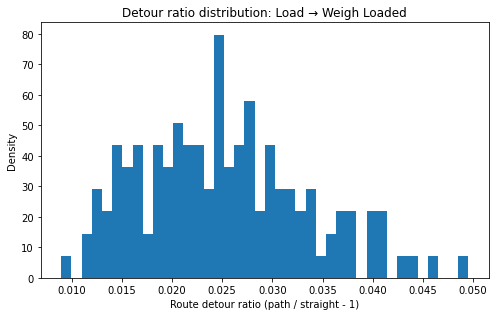

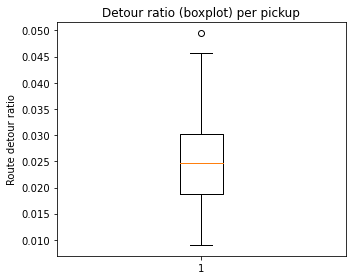

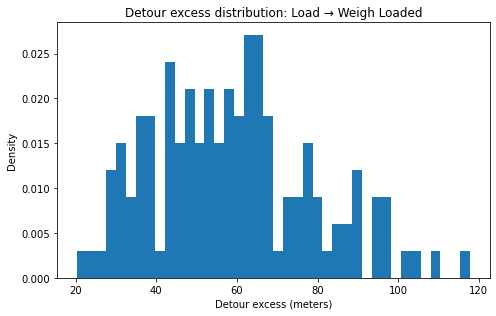

In [464]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 哈弗辛（米） ---
def haversine_np(lat1, lon1, lat2, lon2):
    R = 6371000.0
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat, dlon = lat2 - lat1, lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2*R*np.arcsin(np.sqrt(a))

# 1) 取本段轨迹并排序
sp = selected_path.copy()
sp = sp[sp['Path_Stage'] == 'yard_to_weigh'].copy()
sp['Timestamp'] = pd.to_datetime(sp['Timestamp'])
sp = sp.sort_values(['Truck ID','pickup','Timestamp'])

# 2) 轻度清洗：去重复点、过滤离谱跳点（>50 m/s）
sp[['prev_lat','prev_lon','prev_ts']] = (
    sp.groupby(['Truck ID','pickup'])[['Latitude','Longitude','Timestamp']].shift(1)
)
same_point = sp['Latitude'].eq(sp['prev_lat']) & sp['Longitude'].eq(sp['prev_lon'])
sp = sp[~same_point]

step_dist = haversine_np(sp['prev_lat'], sp['prev_lon'], sp['Latitude'], sp['Longitude'])
step_dt   = (sp['Timestamp'] - sp['prev_ts']).dt.total_seconds().to_numpy()
speed     = np.divide(step_dist, step_dt, out=np.zeros_like(step_dist), where=(step_dt>0))
sp['step_dist'] = step_dist
sp['valid_step'] = (step_dt>0) & (speed < 50)  # 50 m/s≈180 km/h，可按需要调

# 3) 逐 pickup 计算路径长度、直线距离与偏移度
def path_metrics(g):
    path_len = g.loc[g['valid_step'], 'step_dist'].sum()
    lat0, lon0 = g.iloc[0][['Latitude','Longitude']]
    lat1, lon1 = g.iloc[-1][['Latitude','Longitude']]
    d_straight = float(haversine_np(lat0, lon0, lat1, lon1))
    detour_excess = max(0.0, path_len - d_straight)
    detour_ratio  = (path_len / d_straight - 1.0) if d_straight > 0 else 0.0
    return pd.Series({
        'path_len_m': path_len,
        'd_straight_m': d_straight,
        'detour_excess_m': detour_excess,
        'detour_ratio': detour_ratio
    })

pickup_detour = (sp.groupby(['Truck ID','pickup'], as_index=False)
                   .apply(path_metrics)
                   .reset_index(drop=True))

# （可选）去掉极端异常（比如 detour_ratio > 5 的孤立值）
pickup_detour = pickup_detour[(pickup_detour['detour_ratio'] >= 0) & (pickup_detour['detour_ratio'] <= 5)]

# 4) 画图：直方图 & 箱线图
vals = pickup_detour['detour_ratio'].to_numpy()

plt.figure(figsize=(7,4.5))
plt.hist(vals, bins=40, density=True)
plt.xlabel('Route detour ratio (path / straight - 1)')
plt.ylabel('Density')
plt.title('Detour ratio distribution: Load → Weigh Loaded')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,4))
plt.boxplot(vals, vert=True, showfliers=True)
plt.ylabel('Route detour ratio')
plt.title('Detour ratio (boxplot) per pickup')
plt.tight_layout()
plt.show()

# 想看绝对偏移量（米）也可以再画一个：
plt.figure(figsize=(7,4.5))
plt.hist(pickup_detour['detour_excess_m'].to_numpy(), bins=40, density=True)
plt.xlabel('Detour excess (meters)')
plt.ylabel('Density')
plt.title('Detour excess distribution: Load → Weigh Loaded')
plt.tight_layout()
plt.show()


In [ ]:
sorted = df['pickup'].unique()
len(sorted)
# 489

489

In [ ]:
df_summer_long = df[df['pickup'].isin(summer_long_id)]
len(df_summer_long['pickup'].unique())

114

In [ ]:
summer_short = pd.read_csv('Success_Short_TurnAround.csv')
summer_short_id = summer_short['pickup']
summer_short_id

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
         ...  
26012    487.0
26013    487.0
26014    487.0
26015    487.0
26016    487.0
Name: pickup, Length: 26017, dtype: float64

In [ ]:
df_summer_short = df[df['pickup'].isin(summer_short_id)]
len(df_summer_short['pickup'].unique())

341

In [416]:
df['RFID tag'].unique()

array(['rfidXNPCXE', 'rfidVIASXP', 'rfidQSKZVB', 'rfidVYEBVG',
       'rfidGTHHGD', 'rfidDRCUXI', 'rfidFMSUBE', 'rfidXXIVNB',
       'rfidOIGYVC', 'rfidSCPJCE', 'rfidTLWXGZ', 'rfidYGABPB',
       'rfidKEBJGC', 'rfidOOVDPE', 'rfidJRRVME', 'rfidPODCVH',
       'rfidKGKHYU', 'rfidEJHYOM', 'rfidGETQDY', 'rfidNQRMLR',
       'rfidSLQPDR', 'rfidWOMLHU', 'rfidMVJRXE', 'rfidSVWFVZ',
       'rfidCEZEBQ', 'rfidRCKRLL', 'rfidMFTSWW', 'rfidZEKWJR',
       'rfidUSNSHC', 'rfidIDWLCS', 'rfidTGNSNI', 'rfidEGNSMV',
       'rfidQCYTDW', 'rfidJDEWMH', 'rfidNJSWIM', 'rfidCBMLGM',
       'rfidYREIDQ', 'rfidPCMKUV', 'rfidUOOSAQ', 'rfidBKTRLP',
       'rfidIICVAH', 'rfidLEEHFK', 'rfidXPDNSC', 'rfidJGLUGP',
       'rfidNSELSE', 'rfidSQKJGH', 'rfidVYYKGK', 'rfidENJOLW',
       'rfidXWLCID', 'rfidHYTHBN'], dtype=object)

In [ ]:
# selected = df[(df['RFID tag'] == 'rfidQAZFOJ')]
selected_entry = df[df['Path_Stage'] == 'entry_to_register']
first_coords = selected_entry.sort_values("Timestamp").groupby(["RFID tag", "Pickup Plan ID"], as_index=False).first()
first_coords

RFID tag Pickup Plan ID    GPS_ID           Timestamp  Latitude  \
0    rfidBKTRLP         Pcp159   GPS_tr1 2024-05-14 09:28:45    21.986   
1    rfidBKTRLP          Pcp20   GPS_tr1 2024-05-12 08:52:31    21.986   
2    rfidBKTRLP         Pcp223   GPS_tr1 2024-05-24 15:05:30    21.986   
3    rfidBKTRLP          Pcp27   GPS_tr1 2024-05-16 10:19:04    21.986   
4    rfidBKTRLP         Pcp297   GPS_tr1 2024-05-22 13:57:18    21.986   
..          ...            ...       ...                 ...       ...   
484  rfidZEKWJR         Pcp260  GPS_tr40 2024-05-10 22:14:24    21.986   
485  rfidZEKWJR         Pcp395  GPS_tr40 2024-05-17 03:09:01    21.986   
486  rfidZEKWJR         Pcp452  GPS_tr40 2024-05-19 04:21:00    21.986   
487  rfidZEKWJR         Pcp466  GPS_tr40 2024-05-15 01:07:36    21.986   
488  rfidZEKWJR           Pcp9  GPS_tr40 2024-05-23 05:43:15    21.986   

     Longitude        Date         Path_Stage Truck ID  pickup  
0      100.489  2024-05-14  entry_to_register      tr1     5.0  
1      100.489  2024-05-12  entry_to_register      tr1     4.0  
2      100.489  2024-05-24  entry_to_register      tr1    10.0  
3      100.489  2024-05-16  entry_to_register      tr1     6.0  
4      100.489  2024-05-22  entry_to_register      tr1     9.0  
..         ...         ...                ...      ...     ...  
484    100.489  2024-05-10  entry_to_register     tr40   335.0  
485    100.489  2024-05-17  entry_to_register     tr40   338.0  
486    100.489  2024-05-19  entry_to_register     tr40   339.0  
487    100.489  2024-05-15  entry_to_register     tr40   337.0  
488    100.489  2024-05-23  entry_to_register     tr40   341.0  

[489 rows x 10 columns]

In [417]:
df2 = df[df['RFID tag']=='rfidVIASXP']
df2

GPS_ID    RFID tag Pickup Plan ID           Timestamp  Latitude  \
18     GPS_tr38  rfidVIASXP          Pcp35 2024-05-02 23:59:13   21.9860   
19     GPS_tr38  rfidVIASXP          Pcp35 2024-05-02 23:59:18   21.9868   
20     GPS_tr38  rfidVIASXP          Pcp35 2024-05-02 23:59:23   21.9874   
21     GPS_tr38  rfidVIASXP          Pcp35 2024-05-02 23:59:28   21.9878   
22     GPS_tr38  rfidVIASXP          Pcp35 2024-05-02 23:59:33   21.9882   
...         ...         ...            ...                 ...       ...   
37625  GPS_tr38  rfidVIASXP         Pcp250 2024-05-24 17:41:44   21.9837   
37626  GPS_tr38  rfidVIASXP         Pcp250 2024-05-24 17:41:49   21.9841   
37627  GPS_tr38  rfidVIASXP         Pcp250 2024-05-24 17:41:54   21.9844   
37628  GPS_tr38  rfidVIASXP         Pcp250 2024-05-24 17:41:59   21.9848   
37629  GPS_tr38  rfidVIASXP         Pcp250 2024-05-24 17:42:04   21.9850   

       Longitude        Date         Path_Stage Truck ID  pickup  
18      100.4890  2024-05-02  entry_to_register     tr38   301.0  
19      100.4895  2024-05-02  entry_to_register     tr38   301.0  
20      100.4894  2024-05-02  entry_to_register     tr38   301.0  
21      100.4896  2024-05-02  entry_to_register     tr38   301.0  
22      100.4899  2024-05-02  entry_to_register     tr38   301.0  
...          ...         ...                ...      ...     ...  
37625   100.5690  2024-05-24      weigh_to_exit     tr38   311.0  
37626   100.5693  2024-05-24      weigh_to_exit     tr38   311.0  
37627   100.5697  2024-05-24      weigh_to_exit     tr38   311.0  
37628   100.5699  2024-05-24      weigh_to_exit     tr38   311.0  
37629   100.5700  2024-05-24      weigh_to_exit     tr38   311.0  

[914 rows x 10 columns]

In [421]:
selected_rfid = "rfidVIASXP"
selected_date = pd.to_datetime("2024-05-06").date()
truck_data = df[(df["RFID tag"] == selected_rfid)]
truck_data = truck_data.sort_values("Timestamp")
truck_data2 = truck_data[truck_data["Timestamp"].dt.date == selected_date]
truck_data2

GPS_ID    RFID tag Pickup Plan ID           Timestamp  Latitude  \
715   GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 04:50:32   21.9860   
720   GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 04:50:37   21.9868   
725   GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 04:50:42   21.9871   
729   GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 04:50:47   21.9875   
734   GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 04:50:52   21.9880   
...        ...         ...            ...                 ...       ...   
2934  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 06:09:45   21.9833   
2935  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 06:09:50   21.9836   
2936  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 06:09:55   21.9841   
2937  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 06:10:00   21.9842   
2938  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 06:10:05   21.9847   

      Longitude        Date         Path_Stage Truck ID  pickup  
715    100.4890  2024-05-06  entry_to_register     tr38   302.0  
720    100.4895  2024-05-06  entry_to_register     tr38   302.0  
725    100.4900  2024-05-06  entry_to_register     tr38   302.0  
729    100.4901  2024-05-06  entry_to_register     tr38   302.0  
734    100.4902  2024-05-06  entry_to_register     tr38   302.0  
...         ...         ...                ...      ...     ...  
2934   100.5689  2024-05-06      weigh_to_exit     tr38   302.0  
2935   100.5692  2024-05-06      weigh_to_exit     tr38   302.0  
2936   100.5694  2024-05-06      weigh_to_exit     tr38   302.0  
2937   100.5699  2024-05-06      weigh_to_exit     tr38   302.0  
2938   100.5700  2024-05-06      weigh_to_exit     tr38   302.0  

[101 rows x 10 columns]

In [ ]:
stage_colors = {
    "entry_to_register": "green",
    "register_to_weigh": "blue",
    "weigh_to_yard": "orange",
    "yard_to_weigh": "purple",
    "weigh_to_exit": "red",
    "off_path": "gray"
}

In [422]:
entry_data = truck_data2[truck_data2["Path_Stage"] == "register_to_weigh"]
entry_data

GPS_ID    RFID tag Pickup Plan ID           Timestamp  Latitude  \
1273  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:12:48   21.9945   
1277  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:12:53   21.9956   
1281  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:12:58   21.9956   
1284  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:13:03   21.9960   
1288  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:13:08   21.9966   
1292  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:13:13   21.9969   
1295  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:13:18   21.9971   
1298  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:13:23   21.9974   
1301  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:13:28   21.9975   
1304  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:13:33   21.9978   
1307  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:13:38   21.9982   
1310  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:13:43   21.9983   
1312  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:13:48   21.9985   
1314  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:13:53   21.9989   
1316  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:13:58   21.9990   
1318  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:14:03   21.9990   
1320  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:14:08   21.9992   
1322  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:14:13   21.9993   
1324  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:14:18   21.9995   
1327  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:14:23   21.9996   
1331  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:14:28   21.9995   
1335  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:14:33   21.9995   
1339  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:14:38   21.9999   
1342  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:14:43   21.9998   
1345  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:14:48   22.0001   
1348  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:14:53   22.0001   
1352  GPS_tr38  rfidVIASXP          Pcp69 2024-05-06 05:14:58   22.0005   

      Longitude        Date         Path_Stage Truck ID  pickup  
1273   100.4950  2024-05-06  register_to_weigh     tr38   302.0  
1277   100.4967  2024-05-06  register_to_weigh     tr38   302.0  
1281   100.4976  2024-05-06  register_to_weigh     tr38   302.0  
1284   100.4985  2024-05-06  register_to_weigh     tr38   302.0  
1288   100.4994  2024-05-06  register_to_weigh     tr38   302.0  
1292   100.5002  2024-05-06  register_to_weigh     tr38   302.0  
1295   100.5012  2024-05-06  register_to_weigh     tr38   302.0  
1298   100.5021  2024-05-06  register_to_weigh     tr38   302.0  
1301   100.5030  2024-05-06  register_to_weigh     tr38   302.0  
1304   100.5039  2024-05-06  register_to_weigh     tr38   302.0  
1307   100.5048  2024-05-06  register_to_weigh     tr38   302.0  
1310   100.5057  2024-05-06  register_to_weigh     tr38   302.0  
1312   100.5066  2024-05-06  register_to_weigh     tr38   302.0  
1314   100.5075  2024-05-06  register_to_weigh     tr38   302.0  
1316   100.5085  2024-05-06  register_to_weigh     tr38   302.0  
1318   100.5094  2024-05-06  register_to_weigh     tr38   302.0  
1320   100.5104  2024-05-06  register_to_weigh     tr38   302.0  
1322   100.5113  2024-05-06  register_to_weigh     tr38   302.0  
1324   100.5122  2024-05-06  register_to_weigh     tr38   302.0  
1327   100.5132  2024-05-06  register_to_weigh     tr38   302.0  
1331   100.5142  2024-05-06  register_to_weigh     tr38   302.0  
1335   100.5151  2024-05-06  register_to_weigh     tr38   302.0  
1339   100.5160  2024-05-06  register_to_weigh     tr38   302.0  
1342   100.5170  2024-05-06  register_to_weigh     tr38   302.0  
1345   100.5179  2024-05-06  register_to_weigh     tr38   302.0  
1348   100.5189  2024-05-06  register_to_weigh     tr38   302.0  
1352   100.5197  2024-05-06  register_to_weigh     tr38   302.0

In [ ]:
truck_data2[truck_data2["Path_Stage"] == "weigh_to_yard"]

GPS_ID    RFID tag Pickup Plan ID           Timestamp  Latitude  \
44  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 14:49:59   22.0150   
45  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 14:50:04   22.0188   
46  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 14:50:09   22.0206   
47  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 14:50:14   22.0224   
48  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 14:50:19   22.0235   
49  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 14:50:24   22.0249   
50  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 14:50:29   22.0259   
51  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 14:50:34   22.0269   
52  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 14:50:39   22.0279   
53  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 14:50:44   22.0290   
54  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 14:50:49   22.0300   

    Longitude        Date     Path_Stage Truck ID  pickup  
44   100.5250  2024-05-03  weigh_to_yard     tr44   370.0  
45   100.5279  2024-05-03  weigh_to_yard     tr44   370.0  
46   100.5294  2024-05-03  weigh_to_yard     tr44   370.0  
47   100.5309  2024-05-03  weigh_to_yard     tr44   370.0  
48   100.5329  2024-05-03  weigh_to_yard     tr44   370.0  
49   100.5348  2024-05-03  weigh_to_yard     tr44   370.0  
50   100.5369  2024-05-03  weigh_to_yard     tr44   370.0  
51   100.5390  2024-05-03  weigh_to_yard     tr44   370.0  
52   100.5411  2024-05-03  weigh_to_yard     tr44   370.0  
53   100.5432  2024-05-03  weigh_to_yard     tr44   370.0  
54   100.5450  2024-05-03  weigh_to_yard     tr44   370.0

In [ ]:
truck_data2[truck_data2["Path_Stage"] == "yard_to_weigh"]

GPS_ID    RFID tag Pickup Plan ID           Timestamp  Latitude  \
125  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:46:58   22.0200   
126  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:47:03   22.0206   
127  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:47:08   22.0211   
128  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:47:13   22.0211   
129  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:47:18   22.0217   
130  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:47:23   22.0221   
131  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:47:28   22.0227   
132  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:47:33   22.0232   
133  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:47:38   22.0237   
134  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:47:43   22.0241   
135  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:47:48   22.0243   
136  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:47:53   22.0247   
137  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:47:58   22.0248   
138  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:48:03   22.0250   

     Longitude        Date     Path_Stage Truck ID  pickup  
125   100.5000  2024-05-03  yard_to_weigh     tr44   370.0  
126   100.5017  2024-05-03  yard_to_weigh     tr44   370.0  
127   100.5024  2024-05-03  yard_to_weigh     tr44   370.0  
128   100.5033  2024-05-03  yard_to_weigh     tr44   370.0  
129   100.5041  2024-05-03  yard_to_weigh     tr44   370.0  
130   100.5049  2024-05-03  yard_to_weigh     tr44   370.0  
131   100.5056  2024-05-03  yard_to_weigh     tr44   370.0  
132   100.5064  2024-05-03  yard_to_weigh     tr44   370.0  
133   100.5071  2024-05-03  yard_to_weigh     tr44   370.0  
134   100.5079  2024-05-03  yard_to_weigh     tr44   370.0  
135   100.5088  2024-05-03  yard_to_weigh     tr44   370.0  
136   100.5096  2024-05-03  yard_to_weigh     tr44   370.0  
137   100.5105  2024-05-03  yard_to_weigh     tr44   370.0  
138   100.5112  2024-05-03  yard_to_weigh     tr44   370.0

In [ ]:
truck_data2[truck_data2["Path_Stage"] == "weigh_to_exit"]

GPS_ID    RFID tag Pickup Plan ID           Timestamp  Latitude  \
140  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:49:19   21.9909   
141  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:49:24   21.9912   
142  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:49:29   21.9916   
143  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:49:34   21.9919   
144  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:49:39   21.9922   
145  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:49:44   21.9929   
146  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:49:49   21.9931   
147  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:49:54   21.9936   
148  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:49:59   21.9938   
149  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:50:04   21.9943   
150  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:50:09   21.9946   
151  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:50:14   21.9950   
152  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:50:19   21.9950   
153  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:50:24   21.9950   
154  GPS_tr44  rfidJRRVME         Pcp419 2024-05-03 16:50:29   21.9950   

     Longitude        Date     Path_Stage Truck ID  pickup  
140   100.5212  2024-05-03  weigh_to_exit     tr44   370.0  
141   100.5219  2024-05-03  weigh_to_exit     tr44   370.0  
142   100.5225  2024-05-03  weigh_to_exit     tr44   370.0  
143   100.5232  2024-05-03  weigh_to_exit     tr44   370.0  
144   100.5239  2024-05-03  weigh_to_exit     tr44   370.0  
145   100.5244  2024-05-03  weigh_to_exit     tr44   370.0  
146   100.5251  2024-05-03  weigh_to_exit     tr44   370.0  
147   100.5257  2024-05-03  weigh_to_exit     tr44   370.0  
148   100.5264  2024-05-03  weigh_to_exit     tr44   370.0  
149   100.5270  2024-05-03  weigh_to_exit     tr44   370.0  
150   100.5277  2024-05-03  weigh_to_exit     tr44   370.0  
151   100.5283  2024-05-03  weigh_to_exit     tr44   370.0  
152   100.5292  2024-05-03  weigh_to_exit     tr44   370.0  
153   100.5299  2024-05-03  weigh_to_exit     tr44   370.0  
154   100.5300  2024-05-03  weigh_to_exit     tr44   370.0

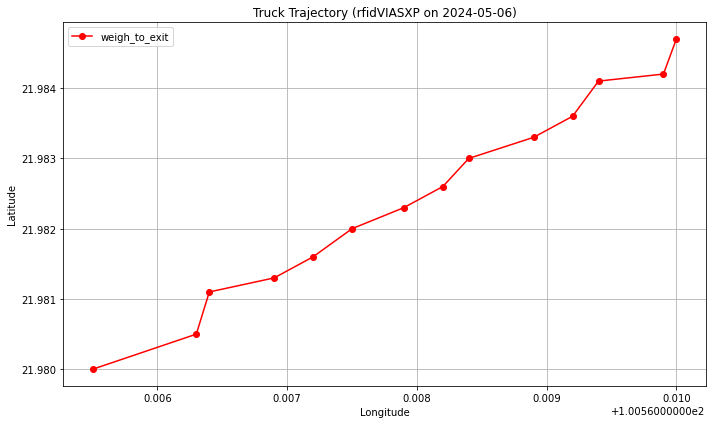

In [428]:
plt.figure(figsize=(10, 6))
entry_data = truck_data2[truck_data2["Path_Stage"] == "weigh_to_exit"]
for stage, group in entry_data.groupby("Path_Stage"):
    plt.plot(group["Longitude"].to_numpy(), group["Latitude"].to_numpy(), linestyle='-', marker='o',
             color=stage_colors.get(stage, "black"), label=stage)

plt.title(f"Truck Trajectory ({selected_rfid} on {selected_date})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

def plot_paths_by_rfid_and_plan(entry_data: pd.DataFrame):
    # 创建组合键列
    entry_data["RFID_Plan"] = entry_data["RFID tag"].astype(str) + "_" + entry_data["Pickup Plan"].astype(str)

    # 获取所有唯一组合
    unique_keys = entry_data["RFID_Plan"].unique()
    n_colors = len(unique_keys)

    # 生成颜色列表（HSV 适合多个类别）
    colors = cm.get_cmap("hsv", n_colors)

    plt.figure(figsize=(12, 6))

    for idx, (rfid_plan, group) in enumerate(entry_data.groupby("RFID_Plan")):
        group = group.sort_values("Timestamp")
        lons = group["Longitude"].to_numpy()
        lats = group["Latitude"].to_numpy()
        plt.plot(lons, lats, linestyle='-', marker='o', alpha=0.7, label=rfid_plan, color=colors(idx))

    plt.title("Entry to Register Paths by RFID and Pickup Plan")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # 图例太多时只显示前 20 个
    if n_colors <= 20:
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='xx-small')
    else:
        handles, labels = plt.gca().get_legend_handles_labels()
        plt.legend(handles[:20], labels[:20], loc='upper left', bbox_to_anchor=(1, 1), fontsize='xx-small', title='(showing first 20)')

    plt.tight_layout()
    plt.show()


In [ ]:
plot_paths_by_rfid_and_plan(entry_data)

KeyError: 'Pickup Plan'

In [ ]:
plt.figure(figsize=(12, 6))

summer_short = df_summer_short[df_summer_short["Path_Stage"] == "yard_to_weigh"]

for rfid, group in summer_short.groupby("RFID tag"):
    group = group.sort_values("Timestamp")  
    lons = group["Longitude"].to_numpy()
    lats = group["Latitude"].to_numpy()

    plt.plot(lons, lats, linestyle='-', marker='o', alpha=0.6)

    # 在起点位置标注 RFID tag
    plt.text(lons[0], lats[0], str(rfid), fontsize=8, color="black", ha='right')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("The path from Loaded stack to the loaded weighing weighbridge by RFID for Summer Normal Cohort")
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'df_summer_short' is not defined

<Figure size 864x432 with 0 Axes>

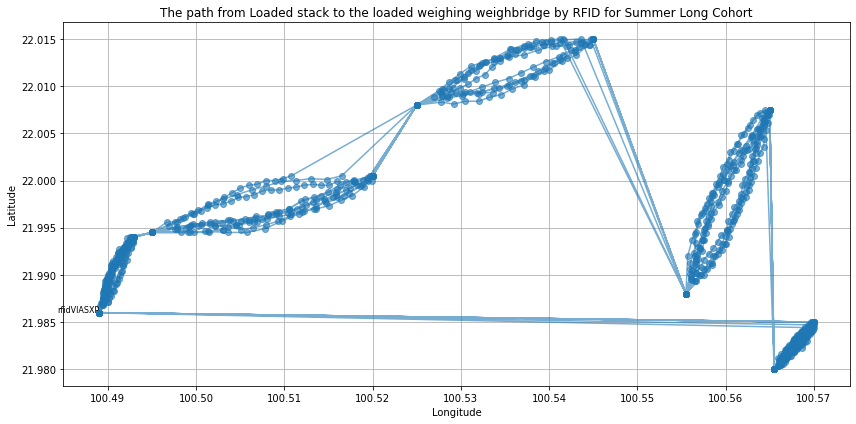

In [429]:
plt.figure(figsize=(12, 6))

# summer_long = df_summer_long[df_summer_long["Path_Stage"] == "register_to_weigh"]
# df_selected = df[df['Path_Stage'] == "register_to_weigh"]

for rfid, group in df2.groupby("RFID tag"):
    group = group.sort_values("Timestamp")  
    lons = group["Longitude"].to_numpy()
    lats = group["Latitude"].to_numpy()

    plt.plot(lons, lats, linestyle='-', marker='o', alpha=0.6)

    # 在起点位置标注 RFID tag
    plt.text(lons[0], lats[0], str(rfid), fontsize=8, color="black", ha='right')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("The path from Loaded stack to the loaded weighing weighbridge by RFID for Summer Long Cohort")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
lat_start, lon_start = 22.0200, 100.5000
lat_end, lon_end = 22.0250, 100.5150


In [ ]:
def calculate_perpendicular_distance(lat, lon, lat_start, lon_start, lat_end, lon_end):
    
    v = np.array([lat_end - lat_start, lon_end - lon_start])
    w = np.array([lat - lat_start, lon - lon_start])


    c1 = np.dot(w, v)
    c2 = np.dot(v, v)
    if c2 == 0:
        return np.linalg.norm(w)
    b = c1 / c2
    pb = np.array([lat_start, lon_start]) + b * v

    return np.linalg.norm(np.array([lat, lon]) - pb)

In [ ]:
df['deviation'] = df.apply(
    lambda row: calculate_perpendicular_distance(
        row['Latitude'], row['Longitude'],
        lat_start, lon_start, lat_end, lon_end
    ), axis=1
)

In [ ]:
df

GPS_ID    RFID tag Pickup Plan ID           Timestamp  Latitude  \
0      GPS_tr41  rfidXWLCID         Pcp109 2024-05-03 05:40:18   21.9860   
1      GPS_tr41  rfidXWLCID         Pcp109 2024-05-03 05:40:23   21.9863   
2      GPS_tr41  rfidXWLCID         Pcp109 2024-05-03 05:40:28   21.9866   
3      GPS_tr41  rfidXWLCID         Pcp109 2024-05-03 05:40:33   21.9861   
4      GPS_tr23  rfidKGKHYU         Pcp109 2024-05-03 05:40:38   21.9860   
...         ...         ...            ...                 ...       ...   
46325  GPS_tr18  rfidEGNSMV         Pcp373 2024-05-29 14:43:05   21.9944   
46326  GPS_tr18  rfidEGNSMV         Pcp373 2024-05-29 14:43:10   21.9946   
46327  GPS_tr18  rfidEGNSMV         Pcp373 2024-05-29 14:43:15   21.9945   
46328  GPS_tr18  rfidEGNSMV         Pcp373 2024-05-29 14:43:20   21.9948   
46329  GPS_tr18  rfidEGNSMV         Pcp373 2024-05-29 14:43:25   21.9950   

       Longitude        Date         Path_Stage Truck ID  pickup  deviation  
0       100.4890  2024-05-03  entry_to_register     tr41   342.0   0.028777  
1       100.4894  2024-05-03  entry_to_register     tr41   342.0   0.028619  
2       100.4895  2024-05-03  entry_to_register     tr41   342.0   0.028366  
3       100.4902  2024-05-03  entry_to_register     tr41   342.0   0.029061  
4       100.4890  2024-05-03  entry_to_register     tr23   147.0   0.028777  
...          ...         ...                ...      ...     ...        ...  
46325   100.5278  2024-05-29      weigh_to_exit     tr18    96.0   0.033077  
46326   100.5283  2024-05-29      weigh_to_exit     tr18    96.0   0.033046  
46327   100.5290  2024-05-29      weigh_to_exit     tr18    96.0   0.033362  
46328   100.5295  2024-05-29      weigh_to_exit     tr18    96.0   0.033236  
46329   100.5300  2024-05-29      weigh_to_exit     tr18    96.0   0.033204  

[46330 rows x 11 columns]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_summer_long, x='deviation', label='Long Cohort', fill=True)
sns.kdeplot(data=df_summer_short, x='deviation', label='Normal Cohort', fill=True)

plt.xlabel('Perpendicular Deviation (degrees)')
plt.ylabel('Density')
plt.title('Deviation from Ideal Path: Long vs Normal Pickups')
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'df_summer_long' is not defined

<Figure size 720x360 with 0 Axes>

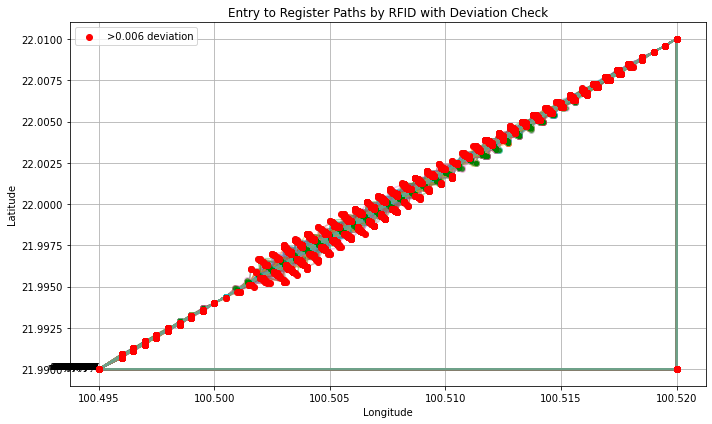

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 理想路径起点和终点
entrance = np.array([100.4890, 21.9860])
warehouse = np.array([100.4930, 21.9890])

# 偏移阈值
threshold = 0.0002

# 函数：计算点 p 到直线 ab 的距离
def distance_to_line(p, a, b):
    ap = p - a
    ab = b - a
    t = np.dot(ap, ab) / np.dot(ab, ab)
    proj = a + t * ab
    return np.linalg.norm(p - proj)

plt.figure(figsize=(10, 6))
entry_data = df[df["Path_Stage"] == "register_to_weigh"]

for rfid, group in entry_data.groupby("RFID tag"):
    group = group.sort_values("Timestamp")
    lons = group["Longitude"].to_numpy()
    lats = group["Latitude"].to_numpy()
    coords = np.column_stack((lons, lats))

    # 计算偏移量
    distances = np.array([distance_to_line(p, entrance, warehouse) for p in coords])
    too_far = distances > threshold
    within_range = ~too_far

    # 主路径
    plt.plot(lons, lats, linestyle='-', marker='o', alpha=0.4)

    # 标出偏移太大的点（红）
    plt.scatter(lons[too_far], lats[too_far], color='red', label='>0.006 deviation' if rfid == entry_data["RFID tag"].iloc[0] else "", zorder=5)

    # 可选：标出其他点为绿色
    plt.scatter(lons[within_range], lats[within_range], color='green', s=15, alpha=0.5, zorder=4)

    # 标注每条轨迹起点
    plt.text(lons[0], lats[0], str(rfid), fontsize=8, color="black", ha='right')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Entry to Register Paths by RFID with Deviation Check")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


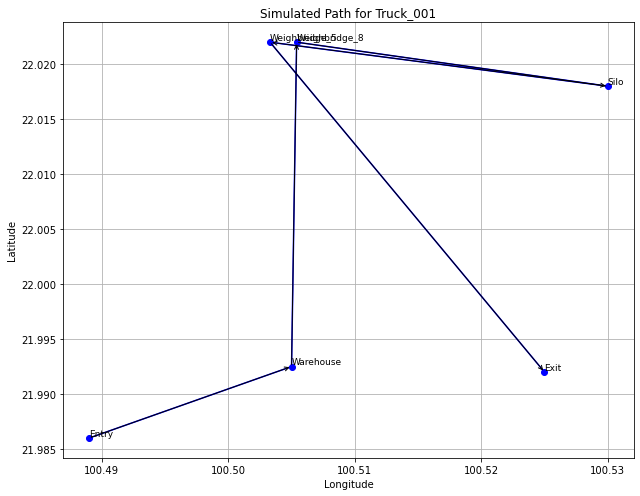

In [ ]:
import random
import matplotlib.pyplot as plt

# 模拟 Truck 的 ID（你可以换成真实 RFID）
truck_id = "Truck_001"

# 固定路径点位（经纬度）
entry = {"stage": "Entry", "lat": 21.9860, "lon": 100.4890}
warehouse = {"stage": "Warehouse", "lat": 21.9925, "lon": 100.5050}
silo = {"stage": "Silo", "lat": 22.0180, "lon": 100.5300}
exit_point = {"stage": "Exit", "lat": 21.9920, "lon": 100.5250}

# 构造 20 个并列地磅位置（同一区域，精度微调）
base_lat = 22.0220
base_lon = 100.5005
gap = 0.0007
weighbridges = [{"stage": f"Weighbridge_{i+1}", "lat": base_lat, "lon": base_lon + i * gap} for i in range(20)]

# 随机选择一个用于进称，一个用于出称
weigh_in = random.choice(weighbridges)
weigh_out = random.choice(weighbridges)

# 生成卡车路径
truck_path = [entry, warehouse, weigh_in, silo, weigh_out, exit_point]

# 可视化轨迹
lats = [p["lat"] for p in truck_path]
lons = [p["lon"] for p in truck_path]
labels = [p["stage"] for p in truck_path]

plt.figure(figsize=(9, 7))
plt.plot(lons, lats, marker='o', linestyle='-', color='blue')

# 标注每个阶段名称
for i, label in enumerate(labels):
    plt.text(lons[i], lats[i], f"{label}", fontsize=9, ha='left', va='bottom')

# 添加箭头（表示方向）
for i in range(len(lons) - 1):
    plt.annotate("",
                 xy=(lons[i+1], lats[i+1]),
                 xytext=(lons[i], lats[i]),
                 arrowprops=dict(arrowstyle="->", color="black"))

plt.title(f"Simulated Path for {truck_id}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()


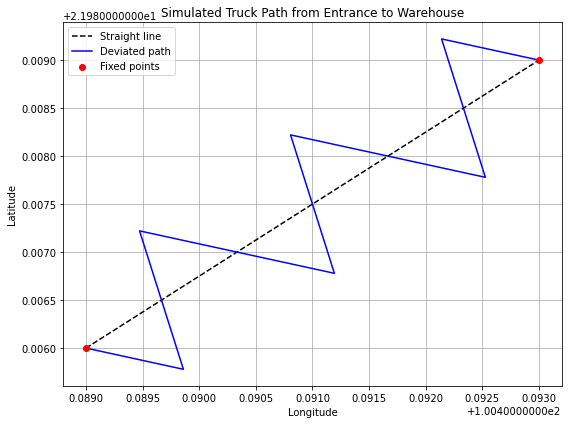

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 固定点（大门和仓库）的经纬度，格式：[lon, lat]
entrance = np.array([100.4890, 21.9860])
warehouse = np.array([100.4930, 21.9890])

# 生成入口到仓库的基准直线路径
num_points = 10
path_straight = np.linspace(entrance, warehouse, num_points)  # 每个点为 [lon, lat]

# 计算基准直线方向（角度，单位：弧度）
delta = warehouse - entrance
baseline_angle = np.arctan2(delta[1], delta[0])
# 垂直于基准线的方向（用于扰动）
ortho_angle = baseline_angle + np.pi/2

# 设置偏移幅度：若幅度较小，则形成小波浪（如 0.0002），较大则为大波浪（如 0.001）
amplitude = 0.0008  # 可以改为 0.001 试试效果

# 生成一个正弦波扰动序列，调节频率（这里设定 10 个波周期）
t = np.linspace(0, 1, num_points)
wave = amplitude * np.sin(60 * 2 * np.pi * t)

# 计算扰动：在正交方向上，每个点的偏移量（注意：wave 为一维数组，需要扩展成二维）
offset = np.outer(wave, [np.cos(ortho_angle), np.sin(ortho_angle)])
# 得到偏离后的路径
path_deviated = path_straight + offset

# 绘制结果
plt.figure(figsize=(8, 6))
plt.plot(path_straight[:,0], path_straight[:,1], 'k--', label='Straight line')
plt.plot(path_deviated[:,0], path_deviated[:,1], 'b-', label='Deviated path')
plt.scatter([entrance[0], warehouse[0]], [entrance[1], warehouse[1]], color='red', zorder=5, label='Fixed points')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Simulated Truck Path from Entrance to Warehouse")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


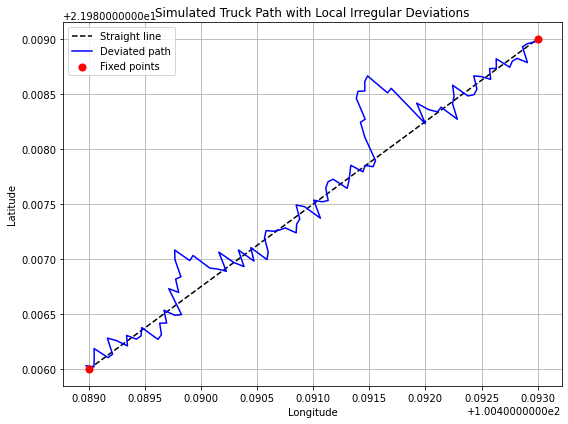

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 固定路径起点与终点
entrance = np.array([100.4890, 21.9860])
warehouse = np.array([100.4930, 21.9890])

# 插值生成直线路径
num_points = 100
path_straight = np.linspace(entrance, warehouse, num_points)

# 主方向与正交方向
delta = warehouse - entrance
baseline_angle = np.arctan2(delta[1], delta[0])
ortho_angle = baseline_angle + np.pi / 2

# 高斯局部偏移区（靠近 t=0.4 和 t=0.7 的部分偏移较大）
t = np.linspace(0, 1, num_points)
center_1, center_2 = 0.25, 0.7
gaussian_wave = (
    np.exp(-((t - center_1)**2) / 0.001) +
    1.5 * np.exp(-((t - center_2)**2) / 0.002)
)
# 加少量随机扰动
np.random.seed(42)
random_noise = 0.2 * np.random.randn(num_points)

# 总偏移量
amplitude = 0.0004
wave = amplitude * (gaussian_wave + random_noise)

# 应用偏移
offset = np.outer(wave, [np.cos(ortho_angle), np.sin(ortho_angle)])
path_deviated = path_straight + offset

# 绘图
plt.figure(figsize=(8, 6))
plt.plot(path_straight[:, 0], path_straight[:, 1], 'k--', label='Straight line')
plt.plot(path_deviated[:, 0], path_deviated[:, 1], 'b-', label='Deviated path')
plt.scatter([entrance[0], warehouse[0]], [entrance[1], warehouse[1]],
            color='red', s=50, zorder=5, label='Fixed points')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Simulated Truck Path with Local Irregular Deviations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



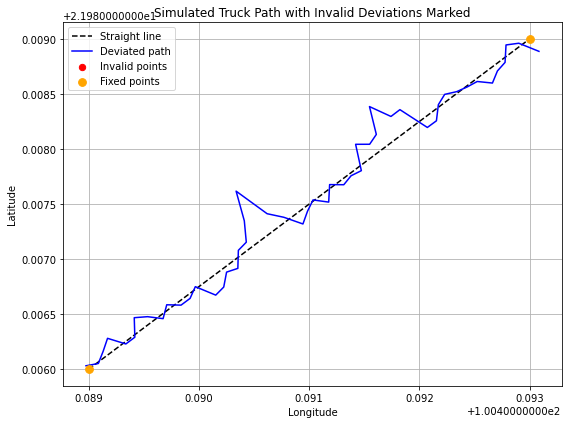

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 固定路径起点与终点
entrance = np.array([100.4890, 21.9860])
warehouse = np.array([100.4930, 21.9890])

# 插值生成直线路径
num_points = 50
path_straight = np.linspace(entrance, warehouse, num_points)

# 主方向与正交方向
delta = warehouse - entrance
baseline_angle = np.arctan2(delta[1], delta[0])
ortho_angle = baseline_angle + np.pi / 2

# 高斯偏移 + 噪声
t = np.linspace(0, 1, num_points)
center_1, center_2 = 0.4, 0.7
gaussian_wave = (
    np.exp(-((t - center_1)**2) / 0.001) +
    0.8 * np.exp(-((t - center_2)**2) / 0.002)
)
np.random.seed(42)
random_noise = 0.2 * np.random.randn(num_points)
amplitude = 0.0004
wave = amplitude * (gaussian_wave + random_noise)
offset = np.outer(wave, [np.cos(ortho_angle), np.sin(ortho_angle)])
path_deviated = path_straight + offset

# 计算每个点偏离直线的距离
def point_line_distance(p, a, b):
    pa = p - a
    ba = b - a
    t = np.dot(pa, ba) / np.dot(ba, ba)
    projection = a + t * ba
    return np.linalg.norm(p - projection)

distances = np.array([point_line_distance(p, entrance, warehouse) for p in path_deviated])
threshold = 0.0005
valid_mask = distances <= threshold
invalid_mask = ~valid_mask

# ---------- 绘图 ----------
plt.figure(figsize=(8, 6))

# 直线路径
plt.plot(path_straight[:, 0], path_straight[:, 1], 'k--', label='Straight line')

# 偏移路径
plt.plot(path_deviated[:, 0], path_deviated[:, 1], 'b-', label='Deviated path')

# ✅ 标红偏离太大的点
plt.scatter(path_deviated[invalid_mask, 0], path_deviated[invalid_mask, 1],
            color='red', s=40, zorder=10, label='Invalid points')

# 固定点（起点终点）
plt.scatter([entrance[0], warehouse[0]], [entrance[1], warehouse[1]],
            color='orange', s=60, zorder=11, label='Fixed points')

# 设置图例与样式
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Simulated Truck Path with Invalid Deviations Marked")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





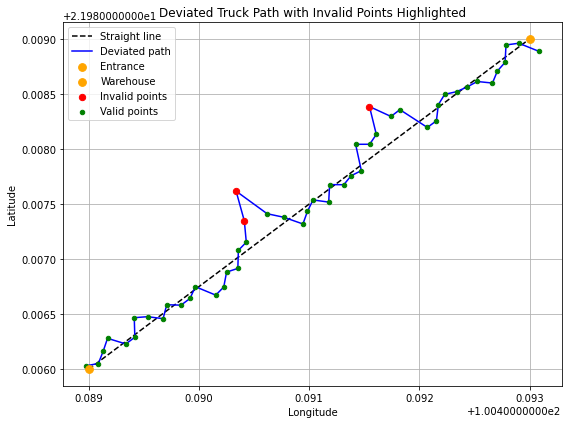

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 起点与终点
entrance = np.array([100.4890, 21.9860])
warehouse = np.array([100.4930, 21.9890])

# 生成直线路径
num_points = 50
path_straight = np.linspace(entrance, warehouse, num_points)

# 方向角度
delta = warehouse - entrance
baseline_angle = np.arctan2(delta[1], delta[0])
ortho_angle = baseline_angle + np.pi / 2

# 高斯偏移波形 + 噪声
t = np.linspace(0, 1, num_points)
gaussian_wave = (
    np.exp(-((t - 0.4)**2) / 0.001) +
    0.8 * np.exp(-((t - 0.7)**2) / 0.002)
)
np.random.seed(42)
random_noise = 0.2 * np.random.randn(num_points)
amplitude = 0.0004
wave = amplitude * (gaussian_wave + random_noise)

# 添加偏移到正交方向
offset = np.outer(wave, [np.cos(ortho_angle), np.sin(ortho_angle)])
path_deviated = path_straight + offset

# ---------- 距离函数 ----------
def distance_to_line(p, a, b):
    """计算点 p 到直线 ab 的距离"""
    ap = p - a
    ab = b - a
    t = np.dot(ap, ab) / np.dot(ab, ab)
    proj = a + t * ab
    return np.linalg.norm(p - proj)

# 计算所有点到直线的距离
distances = np.array([distance_to_line(p, entrance, warehouse) for p in path_deviated])

# 阈值：超过的为 invalid
threshold = 0.0002
invalid_mask = distances > threshold
valid_mask = ~invalid_mask

# ---------- 绘图 ----------
plt.figure(figsize=(8, 6))

# 绘制路径
plt.plot(path_straight[:, 0], path_straight[:, 1], 'k--', label='Straight line')
plt.plot(path_deviated[:, 0], path_deviated[:, 1], 'b-', label='Deviated path')

# 起点终点
plt.scatter(*entrance, color='orange', s=60, label='Entrance', zorder=5)
plt.scatter(*warehouse, color='orange', s=60, label='Warehouse', zorder=5)

# ✅ 标红：偏离大的点
plt.scatter(path_deviated[invalid_mask, 0], path_deviated[invalid_mask, 1],
            color='red', s=40, label='Invalid points', zorder=6)

# ✅ 可选：标绿 valid 点（便于确认）
plt.scatter(path_deviated[valid_mask, 0], path_deviated[valid_mask, 1],
            color='green', s=20, label='Valid points', zorder=4)

# 样式设置
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Deviated Truck Path with Invalid Points Highlighted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# 起点和终点
entrance = np.array([100.4890, 21.9860])
warehouse = np.array([100.4930, 21.9890])

# 主方向 & 正交方向
delta = warehouse - entrance
norm_total = np.linalg.norm(delta)
unit_vec = delta / norm_total
ortho_vec = np.array([-unit_vec[1], unit_vec[0]])

# 状态变量
current_point = entrance.copy()
t_progress = 0.0
step_distance = 0.00005  # 每次推进这么多距离
np.random.seed(42)

# 高斯中心
center_1, center_2 = 0.4, 0.7
amplitude = 0.0004

def next_gps_point():
    global current_point, t_progress
    
    # 如果到达终点或非常接近，就停止
    if np.linalg.norm(warehouse - current_point) < step_distance:
        return None
    
    # 更新 t 位置
    t_progress += step_distance / norm_total
    t = min(t_progress, 1.0)

    # 计算偏移量
    wave = amplitude * (
        np.exp(-((t - center_1)**2) / 0.001) +
        0.8 * np.exp(-((t - center_2)**2) / 0.002)
    )
    wave += 0.00005 * np.random.uniform(-1, 1)

    # 下一个点 = 当前点 + 主方向推进 + 正交扰动
    step_vec = step_distance * unit_vec
    deviation = wave * ortho_vec
    new_point = current_point + step_vec + deviation

    current_point = new_point
    return tuple(np.round(new_point, 6))


In [ ]:
pt = next_gps_point()
pt

(100.489489, 21.986432)

In [ ]:
class GPSPathGenerator:
    def __init__(self, step_size=0.01):
        self.lat_entry = 21.9860
        self.lon_entry = 100.4890
        self.lat_warehouse = 21.9890
        self.lon_warehouse = 100.4930

        self.direction_lat = self.lat_warehouse - self.lat_entry
        self.direction_lon = self.lon_warehouse - self.lon_entry
        self.norm = np.sqrt(self.direction_lat**2 + self.direction_lon**2)

        self.unit_lat = self.direction_lat / self.norm
        self.unit_lon = self.direction_lon / self.norm

        self.ortho_lat = -self.unit_lon
        self.ortho_lon = self.unit_lat

        self.t = 0.0
        self.step_size = step_size

    def gaussian(self, x, mu, sigma):
        return np.exp(-((x - mu)**2) / (2 * sigma**2))

    def generate_point(self):
        t = self.t
        self.t = min(1.0, self.t + self.step_size)  # avoid exceeding 1.0

        base_lat = self.lat_entry + t * self.direction_lat
        base_lon = self.lon_entry + t * self.direction_lon

        center1 = 0.4
        center2 = 0.7

        wave = 0.000002 * (
            self.gaussian(t, center1, 0.001) +
            0.8 * self.gaussian(t, center2, 0.002)
        ) + 0.00005 * np.random.uniform(-1.0, 1.0)

        dev_lat = base_lat + wave * self.ortho_lat
        dev_lon = base_lon + wave * self.ortho_lon

        # Round to 4 decimal places
        lat_rounded = round(dev_lat, 4)
        lon_rounded = round(dev_lon, 4)

        return lat_rounded, lon_rounded

In [ ]:
gen = GPSPathGenerator(step_size=0.01)

points = []
for _ in range(10):
    point = gen.generate_point()
    print(point)
    points.append(point)


(21.986, 100.489)
(21.986, 100.489)
(21.9861, 100.4891)
(21.9861, 100.4891)
(21.9861, 100.4892)
(21.9862, 100.4892)
(21.9862, 100.4893)
(21.9862, 100.4893)
(21.9862, 100.4893)
(21.9863, 100.4893)


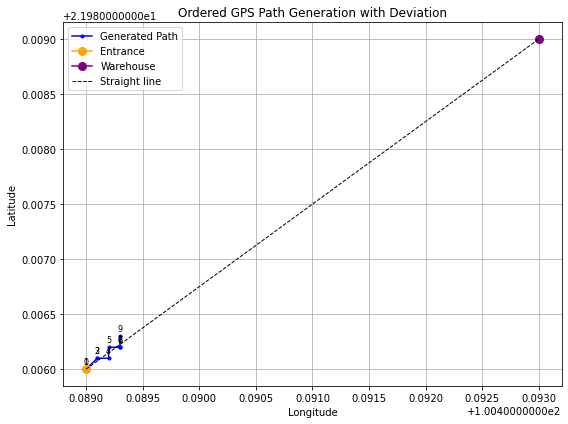

In [ ]:
lats, lons = zip(*points)

# --- 3. 绘图 ---
plt.figure(figsize=(8, 6))
plt.plot(lons, lats, 'b.-', label='Generated Path')

# 标记入口和仓库
plt.plot(100.4890, 21.9860, 'orange', marker='o', markersize=8, label='Entrance')
plt.plot(100.4930, 21.9890, 'purple', marker='o', markersize=8, label='Warehouse')

# 标注编号（可选）
for i, (lon, lat) in enumerate(zip(lons, lats)):
    plt.annotate(str(i), (lon, lat), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# 直线参考线（无偏移）
plt.plot([100.4890, 100.4930], [21.9860, 21.9890], 'k--', linewidth=1, label='Straight line')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Ordered GPS Path Generation with Deviation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

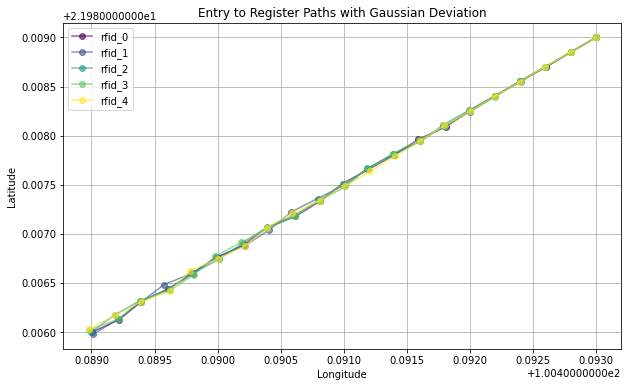

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 配置
lat_min, lat_max = 21.9860, 21.9890
lon_min, lon_max = 100.4890, 100.4930

# 基础方向向量
direction = np.array([lon_max - lon_min, lat_max - lat_min])
norm = np.linalg.norm(direction)
unit = direction / norm
ortho = np.array([-unit[1], unit[0]])

# 每个 RFID 的 t 值记录
rfid_t_map = {}
step_size = 0.05  # 每步增加的 t 值

def gaussian(t, center, sigma):
    return np.exp(-((t - center) ** 2) / (2 * sigma ** 2))

def generate_point(t, bias=None):
    if bias is None:
        bias = random.uniform(1.0, 3.0)
    center1 = 0.4 + bias * 0.1
    center2 = 0.7 - bias * 0.1

    base = np.array([lon_min, lat_min]) + t * direction
    wave_sign = random.choice([-1.0, 1.0])
    wave = wave_sign * (1 - t) * (
        0.0004 * (gaussian(t, center1, 0.001) + 0.8 * gaussian(t, center2, 0.002)) +
        0.00005 * random.uniform(-1.0, 1.0)
    )
    offset = wave * ortho
    return base + offset

def step_position(rfid):
    t = rfid_t_map.get(rfid, 0.0)
    if t >= 1.0:
        return np.array([lon_max, lat_max])
    rfid_t_map[rfid] = min(1.0, t + step_size)
    return generate_point(t)

# 示例：可视化多个 RFID 路径
rfids = [f"rfid_{i}" for i in range(5)]
colors = plt.cm.viridis(np.linspace(0, 1, len(rfids)))

plt.figure(figsize=(10, 6))
for rfid, color in zip(rfids, colors):
    rfid_t_map[rfid] = 0.0  # 初始化
    points = []
    for _ in range(int(1 / step_size) + 1):
        pt = step_position(rfid)
        points.append(pt)
    points = np.array(points)
    plt.plot(points[:, 0], points[:, 1], '-o', label=rfid, color=color, alpha=0.6)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Entry to Register Paths with Gaussian Deviation")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import random

# 全局配置
lat_min, lat_max = 21.9860, 21.9890
lon_min, lon_max = 100.4890, 100.4930

direction = np.array([lon_max - lon_min, lat_max - lat_min])
norm = np.linalg.norm(direction)
unit = direction / norm
ortho = np.array([-unit[1], unit[0]])

rfid_t_map = {}  # 记录每个 RFID 当前 t 值
step_size = 0.02  # 步长

def gaussian(t, center, sigma):
    return np.exp(-((t - center) ** 2) / (2 * sigma ** 2))

def generate_entry_point(t, bias=None):
    if bias is None:
        bias = random.uniform(1.0, 3.0)
    center1 = 0.4 + bias * 0.1
    center2 = 0.7 - bias * 0.1
    base = np.array([lon_min, lat_min]) + t * direction
    wave_sign = random.choice([-1.0, 1.0])
    wave = wave_sign * (1 - t) * (
        0.0004 * (gaussian(t, center1, 0.001) + 0.8 * gaussian(t, center2, 0.002)) +
        0.00005 * random.uniform(-1.0, 1.0)
    )
    offset = wave * ortho
    return base + offset

def step_position(rfid):
    t = rfid_t_map.get(rfid, 0.0)
    if t >= 1.0:
        return np.array([lon_max, lat_max])  # 到达终点
    rfid_t_map[rfid] = min(1.0, t + step_size)
    return generate_entry_point(t)


In [ ]:
rfid = "rfid_001"
rfid_t_map[rfid] = 0.0

path_points = []
for _ in range(50):  # 多次调用
    pt = step_position(rfid)
    path_points.append(pt)
    print(f"New point for {rfid}: lon={pt[0]:.6f}, lat={pt[1]:.6f}")

New point for rfid_001: lon=100.489026, lat=21.985966
New point for rfid_001: lon=100.489059, lat=21.986088
New point for rfid_001: lon=100.489168, lat=21.986109
New point for rfid_001: lon=100.489240, lat=21.986180
New point for rfid_001: lon=100.489322, lat=21.986237
New point for rfid_001: lon=100.489400, lat=21.986300
New point for rfid_001: lon=100.489499, lat=21.986334
New point for rfid_001: lon=100.489566, lat=21.986412
New point for rfid_001: lon=100.489627, lat=21.986497
New point for rfid_001: lon=100.489735, lat=21.986520
New point for rfid_001: lon=100.489787, lat=21.986618
New point for rfid_001: lon=100.489879, lat=21.986662
New point for rfid_001: lon=100.489941, lat=21.986745
New point for rfid_001: lon=100.490054, lat=21.986761
New point for rfid_001: lon=100.490134, lat=21.986821
New point for rfid_001: lon=100.490212, lat=21.986884
New point for rfid_001: lon=100.490282, lat=21.986957
New point for rfid_001: lon=100.490377, lat=21.986997
New point for rfid_001: lon=

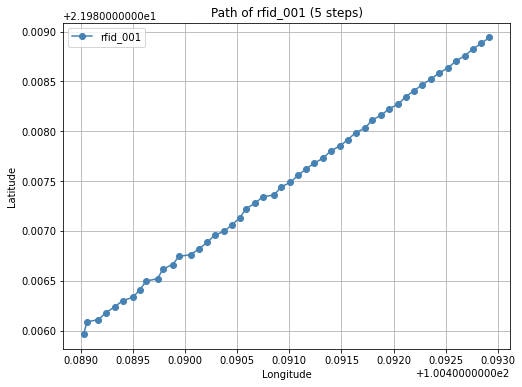

In [ ]:
path_points = np.array(path_points)
plt.figure(figsize=(8, 6))
plt.plot(path_points[:, 0], path_points[:, 1], '-o', color='steelblue', label=rfid)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Path of {rfid} (5 steps)")
plt.grid(True)
plt.legend()
plt.show()

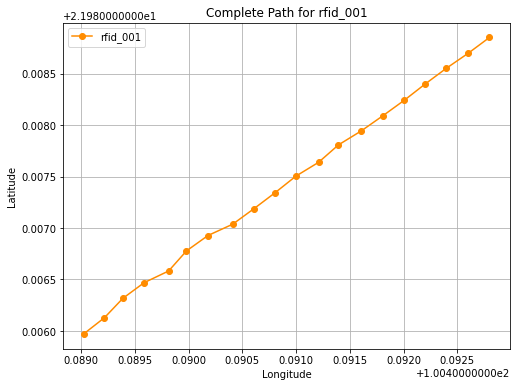

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 区域边界
lat_min, lat_max = 21.9860, 21.9890
lon_min, lon_max = 100.4890, 100.4930

# 路径方向 & 单位向量
direction = np.array([lon_max - lon_min, lat_max - lat_min])
norm = np.linalg.norm(direction)
unit = direction / norm
ortho = np.array([-unit[1], unit[0]])

# t 状态追踪
rfid_t_map = {}
step_size = 0.05

def gaussian(t, center, sigma):
    return np.exp(-((t - center) ** 2) / (2 * sigma ** 2))

def generate_entry_point(t, bias=None):
    if bias is None:
        bias = random.uniform(1.0, 3.0)
    center1 = 0.4 + bias * 0.1
    center2 = 0.7 - bias * 0.1
    base = np.array([lon_min, lat_min]) + t * direction
    wave_sign = random.choice([-1.0, 1.0])
    wave = wave_sign * (1 - t) * (
        0.0004 * (gaussian(t, center1, 0.001) + 0.8 * gaussian(t, center2, 0.002)) +
        0.00005 * random.uniform(-1.0, 1.0)
    )
    offset = wave * ortho
    return base + offset

def step_position(rfid):
    t = rfid_t_map.get(rfid, 0.0)
    if t >= 1.0:
        return np.array([lon_max, lat_max])
    rfid_t_map[rfid] = min(1.0, t + step_size)
    return generate_entry_point(t)

# --------- 生成一条完整路径直到终点 ---------
rfid = "rfid_001"
rfid_t_map[rfid] = 0.0

path_points = []
while True:
    pt = step_position(rfid)
    path_points.append(pt)
    if np.allclose(pt, [lon_max, lat_max], atol=1e-6):
        break

path_points = np.array(path_points)

# --------- 可视化路径 ---------
plt.figure(figsize=(8, 6))
plt.plot(path_points[:, 0], path_points[:, 1], '-o', color='darkorange', label=rfid)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Complete Path for {rfid}")
plt.legend()
plt.grid(True)
plt.show()